# Markov Chain Simulations with Generator Matrices

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Stationary Distribution

We will simulate a continuous-time Markov chain with generator

$$Q=\begin{pmatrix}-3&1&2\\2&-5&3\\5&0&-5\end{pmatrix},$$

starting from state 1 until time $T=100$.

We will find the stationary distribution by calculating the share of time spent in each state and compare this with the theoretical value.

### Calculated Solution:

Before simulating the CTMC for our solution, we will calculate the theoretical stationary distribution below...

To solve for the stationary distribution, $\pi$, we use the equations ${\pi}Q=0$ and $\sum{\pi_j} = 1$.

This gives us...

$$\begin{cases}
    -3\pi_1 + 2\pi_2 + 5\pi_3 = 0 & \mbox{(1)}\\
    \pi_1 - 5\pi_2 = 0 & \mbox{(2)}\\
    2\pi_1 + 3\pi_2 - 5\pi_3 = 0 & \mbox{(3)}\\
    \pi_1 + \pi_2 + \pi_3 = 1 & \mbox{(4)}
\end{cases}$$

Solving $(2)$ we see $\pi_1 = 5\pi_2$.

Plugging this into $(3)$ we see $\pi_3 = \frac{13}{5}\pi_2$.

Plugging this into $(4)$ we have $5\pi_2 + \pi_2 + \frac{13}{5}\pi_2 = 1$, which gives us $\pi_2 = \frac{5}{43}$.

Thus, our stationary distribution is...

$$\pi = \left( \frac{25}{43}, \frac{5}{43}, \frac{13}{43} \right) = \left(0.5814, 0.1163, 0.3023 \right)$$

### Empirical Solution:

Our empirical solution will have two functions.

The first function, $q1Ctmc()$, will simulate the CTMC, $(X_t)_{t \geq 0}$, until $T=100$, returning the time of transition and the new state. It will use a while statement to process through the CTMC until reaching $t>100$, transitioning between states based on the generator function and whichever exponential RV generates the smaller time frame (as if we were measuring which alarm clock goes off first). After $t>100$, we delete the last time step and replace it with $t=100$ and whichever state we ended in, to show whichever state we finished in and for use in calculating our stationary distribution.

The second function, $q1StatDist()$, will use the output from the first function to calculate the share of time that the Markov chain spent in each state. In other words, it calculates the stationary distribution. It does this by recording whichever state the CTMC was in, calculating the time spent before transitioning to the next state, and adding that amount to the state's running total. After iterating through the entire CTMC, we then divide these running time totals by 100 to calculate the share of time spent in each state.

In [2]:
def q1Ctmc():
    state = 1
    t = 0
    ctmc = [(t,state)]
    while t < 100:
        if state == 1:
            to2 = np.random.exponential(1)
            to3 = np.random.exponential(1/2)
            if to2 < to3:
                t += to2
                state = 2
            else:
                t += to3
                state = 3
        elif state == 2:
            to1 = np.random.exponential(1/2)
            to3 = np.random.exponential(1/3)
            if to1 < to3:
                t += to1
                state = 1
            else:
                t += to3
                state = 3
        elif state == 3:
            to1 = np.random.exponential(1/5)
            t += to1
            state = 1
        ctmc.append((t,state))
    ctmc[-1] = (100,ctmc[-2][1])
    return ctmc

def q1StatDist():
    np.random.seed(0)
    ctmc = q1Ctmc()
    statDist = [0,0,0]
    for i in range(1,len(ctmc)):
        if ctmc[i-1][1] == 1:
            statDist[0] += ctmc[i][0] - ctmc[i-1][0]
        elif ctmc[i-1][1] == 2:
            statDist[1] += ctmc[i][0] - ctmc[i-1][0]
        elif ctmc[i-1][1] == 3:
            statDist[2] += ctmc[i][0] - ctmc[i-1][0]
    statDist = [x/100 for x in statDist]
    return statDist

q1StatDist()

[0.5534305186860439, 0.1529382222711811, 0.29363125904277504]

Even running this simulation once to $T=100$, we find an empirical stationary distribution that is close to our theoretical stationary distribution.

Our empirical stationary distribution, $\hat{\pi}$, is...

$$\hat{\pi} = \left( 0.5534, 0.1529, 0.2936 \right),$$

while our theoretical $\pi$ calculated above was...

$$\pi = \left(0.5814, 0.1163, 0.3023 \right).$$

# Empirical Distribution at $t>0$

We will simulate 1000 times, starting from state 2, a continuous-time Markov chain with generator

$$Q=\begin{pmatrix}-3&3\\2&-2\end{pmatrix}$$

We'll find the empirical distribution of this chain at time $t=2$ and compare this with the theoretical value.

## Calculated Solution:

Before simulating the CTMC for our solution, we will calculate the theoretical distribution below...

We have the transition matrix...

$$P(t)=\begin{pmatrix}P_{11}(t)&P_{12}(t)\\P_{21}(t)&P_{22}(t)\end{pmatrix}$$

which, for a two-state CTMC with $q_1 = \lambda$ and $q_2 = \mu$, equals...

$$P(t)=\frac{1}{\lambda + \mu}\begin{pmatrix}
    \mu + \lambda e^{-(\lambda + \mu)t}&
    \lambda - \lambda e^{-(\lambda + \mu)t}\\
    \mu - \mu e^{-(\lambda + \mu)t}&
    \lambda + \mu e^{-(\lambda + \mu)t}
\end{pmatrix}.$$

For our given generator function with $q_1 = 3$ and $q_2 = 2$, we have...

$$P(t)=\begin{pmatrix}
    \frac{2 + 3e^{-5t}}{5}&
    \frac{3 - 3e^{-5t}}{5}\\
    \frac{2 - 2e^{-5t}}{5}&
    \frac{3 + 2e^{-5t}}{5}
\end{pmatrix},$$

and for $t = 2$, we calculate our theoretical distribution to be...

$$P(2)=\begin{pmatrix}
    0.4&
    0.6\\
    0.4&
    0.6
\end{pmatrix}.$$

Thus, since our CTMC is starting in state 2, the probability of ending up in state 1 at time $t=2$ is equal to $P_{21}(2) = 0.4$. The probability of ending up back in state 2 at time $t=2$, considering all possible transitions, is equal to $P_{22}(2) = 0.6$.

Placing these probabilities into equation form...

$$\mathbb{P}(X_2 = 1 | X_0 = 2) = 0.4$$
$$\mathbb{P}(X_2 = 2 | X_0 = 2) = 0.6$$

## Empirical Solution:

Our solution will have two functions.

The first function, $q2Ctmc()$, will simulate the CTMC, $(X_t)_{t \geq 0}$, for 1000 steps, returning the time of transition and the new state at each step. It will transition between states 1 and 2 based on the generator function, transitioning after an amount of time dictated by the exponential RV in each step.

The second function, $q2EmpDist()$, will calculate the time spent in each state until t=2 and print the values. It will also plot the simulated CTMC until t=2. These will demonstrate our empirical distribution for the simulated sample.

Proportion of time spent in state 1: 0.37500004413338656
Proportion of time spent in state 2: 0.6249999558666134
Disribution until t=2:


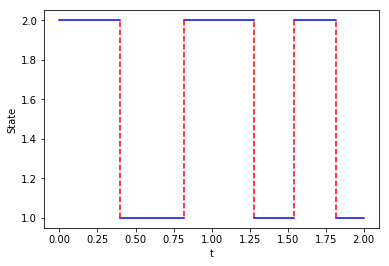

In [3]:
def q2Ctmc():
    state = 2
    t = 0
    ctmc = [(t,state)]
    for n in range(1000):
        if state == 1:
            to2 = np.random.exponential(1/3)
            t += to2
            state = 2
        elif state == 2:
            to1 = np.random.exponential(1/2)
            t += to1
            state = 1
        ctmc.append((t,state))
    return ctmc

def q2Dist(t):
    np.random.seed(0)
    ctmc = q2Ctmc()
    dist = [0,0]
    i = 1
    while ctmc[i][0]<2:
        if ctmc[i-1][1] == 1:
            dist[0] += ctmc[i][0] - ctmc[i-1][0]
        elif ctmc[i-1][1] == 2:
            dist[1] += ctmc[i][0] - ctmc[i-1][0]
        i += 1
    dist = [x/sum(dist) for x in dist]
    print('Proportion of time spent in state 1: ' + str(dist[0]))
    print('Proportion of time spent in state 2: ' + str(dist[1]))
    
    plots = []
    i = 0
    while ctmc[i][0]<2:
        t = ctmc[i][0]
        tNext = ctmc[i+1][0]
        if tNext > 2:
            tNext = 2
        state = ctmc[i][1]
        stateNext = ctmc[i+1][1]
        plots.append(((t,tNext),(state,state)))
        if i != 0:
            plots.append(((t,t),(state,stateNext)))
        i+=1
    print('Disribution until t=2:')
    for x in plots:
        if x[0][0] != x[0][1]:
            plt.plot(x[0],x[1],'b')
        else:
            plt.plot(x[0],x[1],'r--')
    plt.xlabel('t')
    plt.ylabel('State')
    
q2Dist(2)

Note that the proportion of time spent in each state, simulated above, is nearly our calculated distribution.

Above, we calculated...

$$\mathbb{P}(X_2 = 1 | X_0 = 2) = 0.39998184$$
and...
$$\mathbb{P}(X_2 = 2 | X_0 = 2) = 0.60001816.$$

In comparison, we simulated the proportion spent in state 1 to be $0.375$ and the proportion spent in state 2 to be $0.625$.